# Aufgabe 30

### a)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

C:\Users\ju98l\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_hdf('image_parameters_smd_reduced.hdf5')

# Labels erstellen

y = np.array(df['corsika_run_header_particle_id'])
y[y==1] = 1
y[y==14] = 0

In [3]:
# Feature-Set erstellen

size = np.array(df['size'])
width = np.array(df['width'])
length = np.array(df['length'])
islands = np.array(df['num_islands'])
pixel = np.array(df['num_pixel_in_shower'])
charge_mean = np.array(df['photoncharge_shower_mean'])

X = np.vstack((size, width, length, islands, pixel, charge_mean)).T

In [4]:
# Trainings- und Test-Datensatz erstellen

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

### b)

In [5]:
# Klassifizierung mit Random Forest

def auc(n_estimators):
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=2, random_state=0, n_jobs=-1)
    validation = cross_validate(clf, X_train, y_train, cv=5, scoring=['roc_auc'], return_train_score=True)
    
    print('n_estimators = {:.0f}: \n {:.3f} +- {:.3f}'.format(n_estimators, validation['test_roc_auc'].mean(), validation['test_roc_auc'].std()))

auc(1)

n_estimators = 1: 
 0.604 +- 0.006


In [6]:
auc(10)

n_estimators = 10: 
 0.669 +- 0.007


In [7]:
auc(100)

n_estimators = 100: 
 0.687 +- 0.004


Die Area Under Curve ist bei 100 estimators am besten.

### c)

In [8]:
forest = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
predict = forest.predict_proba(X_test)

### d)

Text(0,0.5,'True Positive Rate')

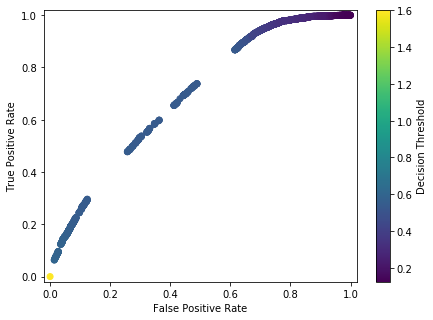

In [9]:
fpr, tpr, t = roc_curve(y_test, predict[:, 1])
plt.figure(figsize=(7, 5))
plt.scatter(fpr, tpr, c=t, cmap='viridis')
plt.colorbar(label='Decision Threshold')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [10]:
print('ROC-AUC-Score: {:.3f}'.format(roc_auc_score(y_test, predict[:, 1])))

ROC-AUC-Score: 0.688


Text(0.5,0,'Classification Score')

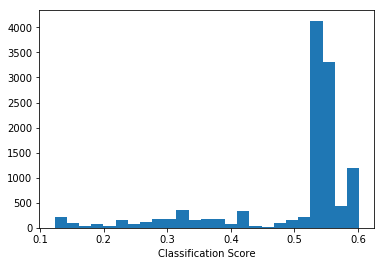

In [11]:
plt.hist(predict[:,1], bins=25)
plt.xlabel('Classification Score')

Die Area Under Curve ist mit 0.688 relativ niedrig und die ROC-Curve liegt nur knapp über der Winkelhalbierenden. Dadurch ist der Klassifizierer nur leicht besser als zufällig zu raten und ist deshalb nicht wirklich dazu geeignet das Signal vom Untergrund zu trennen. Dies sieht man ebenfalls an der Verteilung der Gamma- und Hadronenereignisse. Es sind zwar zwei Peaks erkennbar (der hohe Doppel-Peak bei niedrigerem Classification Score für die Hadronen und der kleinere Peak rechts daneben für die Gammas), allerdings liegen diese so nah beieinander, dasss der Gamma-Peak bei gröberem binning nicht mehr zu erkennen ist. Für einen perfekten Klassifizierer geht die Area Under Curve gegen 1 und die ROC-Curve nähert sich einer Stufenfunktion. Die Verteilung entlang des Classification Scores hätte nur zwei Binss. Den Hadronen-Bin bei 0 und den Gamma-Bin bei 1.